<a href="https://colab.research.google.com/github/Cassiosa/Vendas-da-KCC/blob/main/Vendas_da_KCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Vendas da KCC (Kevin Cookie Company)**


*Detalhes do Projeto*

O projeto tem como objetivo realizar uma análise exploratória e estratégica dos dados de vendas da KCC, uma empresa especializada na produção e comercialização de cookies. A partir de informações armazenadas em um banco de dados, será possível identificar padrões, melhores práticas e oportunidades de melhoria, fornecendo insights acionáveis para decisões de negócio.

*A análise abrange as seguintes dimensões:*

1- Identificação dos 3 melhores clientes, avaliando seu impacto nas vendas e propondo estratégias de fidelização.

2- Avaliação de desempenho dos produtos, determinando quais são os melhores e piores itens do portfólio, e sugerindo substituições ou novos sabores para melhorar a linha de produtos.

3- Detecção de sazonalidade nas vendas, buscando oportunidades para campanhas de marketing direcionadas.

4- Desenvolvimento de uma estratégia de precificação, com recomendações baseadas em desempenho de vendas e custos.


**Objetivos**


1- Fornecer uma análise clara e detalhada dos dados de vendas para embasar decisões estratégicas.

2- Identificar clientes-chave e explorar formas de aumentar a recorrência e o ticket médio.

3- Avaliar produtos com base em seu desempenho para melhorar o portfólio e aumentar as receitas.

4- Explorar sazonalidade para potencializar vendas em períodos específicos.
Criar uma estratégia de precificação que equilibre volume de vendas e margens de lucro.

**Ferramentas Utilizadas**

1- SQL: Para consultas e manipulação de dados no banco de dados.
Funções como GROUP BY, ORDER BY, JOIN, SUM, COUNT e LIMIT serão utilizadas para agregar, ordenar e analisar os dados.

2- Python: Para análises complementares e visualizações de dados (usando bibliotecas como Pandas, Matplotlib e Seaborn).

3 - Plataformas de Big Data e Cloud: Dependendo do volume de dados, o projeto pode ser escalado para plataformas como Google BigQuery ou AWS.

4- Visualização de Dados: Ferramentas como Power BI ou Tableau para apresentação gráfica de KPIs.

**Conceito do Projeto**

O projeto combina Business Intelligence (BI) e análise exploratória para transformar dados brutos de vendas em insights significativos. Ele adota uma abordagem prática, usando consultas SQL para coletar e analisar dados estruturados e apresentando soluções estratégicas para problemas reais da KCC.

Ao final, a empresa terá uma visão clara de:

Quem são seus clientes mais valiosos e como engajá-los.
Como otimizar seu portfólio de produtos.
Quando realizar campanhas sazonais.
Como ajustar preços para maximizar a lucratividade.

In [ ]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carregar os dados do arquivo CSV enviado
file_path = '/content/KCC RESULTADOS.csv'
kcc_data = pd.read_csv(file_path)

# Visualizando as primeiras linhas e informações básicas sobre o dataset
kcc_data.head(), kcc_data.info(), kcc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   ABC Groceries;Salt Lake City;United States;2022-02-18;"Chocolate Chip ";200;1196  37 non-null     object
 1   00                                                                                37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


(  ABC Groceries;Salt Lake City;United States;2022-02-18;"Chocolate Chip ";200;1196  \
 0  ABC Groceries;Salt Lake City;United States;202...                                 
 1  ABC Groceries;Salt Lake City;United States;202...                                 
 2  ABC Groceries;Salt Lake City;United States;202...                                 
 3  ACME Bites;Green Bay;United States;2022-03-07;...                                 
 4  ACME Bites;Green Bay;United States;2022-03-07;...                                 
 
    00  
 0   0  
 1   0  
 2   0  
 3   0  
 4   0  ,
 None,
          00
 count  37.0
 mean    0.0
 std     0.0
 min     0.0
 25%     0.0
 50%     0.0
 75%     0.0
 max     0.0)

In [ ]:
# Separando os dados da primeira coluna usando o delimitador ';'
kcc_data_split = kcc_data.iloc[:, 0].str.split(';', expand=True)

# Nomeando colunas com base nos dados esperados
column_names = ['Cliente', 'Local', 'País', 'Data', 'Produto', 'Quantidade', 'Receita']
kcc_data_split.columns = column_names

# Convertendo colunas 'Data' e 'Receita' para os tipos corretos
kcc_data_split['Data'] = pd.to_datetime(kcc_data_split['Data'], errors='coerce')
kcc_data_split['Quantidade'] = pd.to_numeric(kcc_data_split['Quantidade'], errors='coerce')
kcc_data_split['Receita'] = pd.to_numeric(kcc_data_split['Receita'], errors='coerce')

# Visualizando o resultado da separação e tipos ajustados
kcc_data_split.head(), kcc_data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Cliente     37 non-null     object        
 1   Local       37 non-null     object        
 2   País        37 non-null     object        
 3   Data        37 non-null     datetime64[ns]
 4   Produto     37 non-null     object        
 5   Quantidade  37 non-null     int64         
 6   Receita     37 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.1+ KB


(         Cliente           Local           País       Data            Produto  \
 0  ABC Groceries  Salt Lake City  United States 2022-02-18  "Fortune Cookie "   
 1  ABC Groceries  Salt Lake City  United States 2022-02-25  "Chocolate Chip "   
 2  ABC Groceries  Salt Lake City  United States 2022-02-25           "Sugar "   
 3     ACME Bites       Green Bay  United States 2022-03-07  "Fortune Cookie "   
 4     ACME Bites       Green Bay  United States 2022-03-07   "Snickerdoodle "   
 
    Quantidade  Receita  
 0         196     1196  
 1         136     1415  
 2         245     1415  
 3         155      952  
 4          20      952  ,
 None)

<ipython-input-13-b260063ce3e9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=kcc_data_split, x='Cliente', y='Receita', ci=None, palette='viridis')
<ipython-input-13-b260063ce3e9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kcc_data_split, x='Cliente', y='Receita', ci=None, palette='viridis')
<ipython-input-13-b260063ce3e9>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=kcc_data_split, x='Produto', y='Receita', ci=None, palette='magma')
<ipython-input-13-b260063ce3e9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kcc_data_split, x='Pro

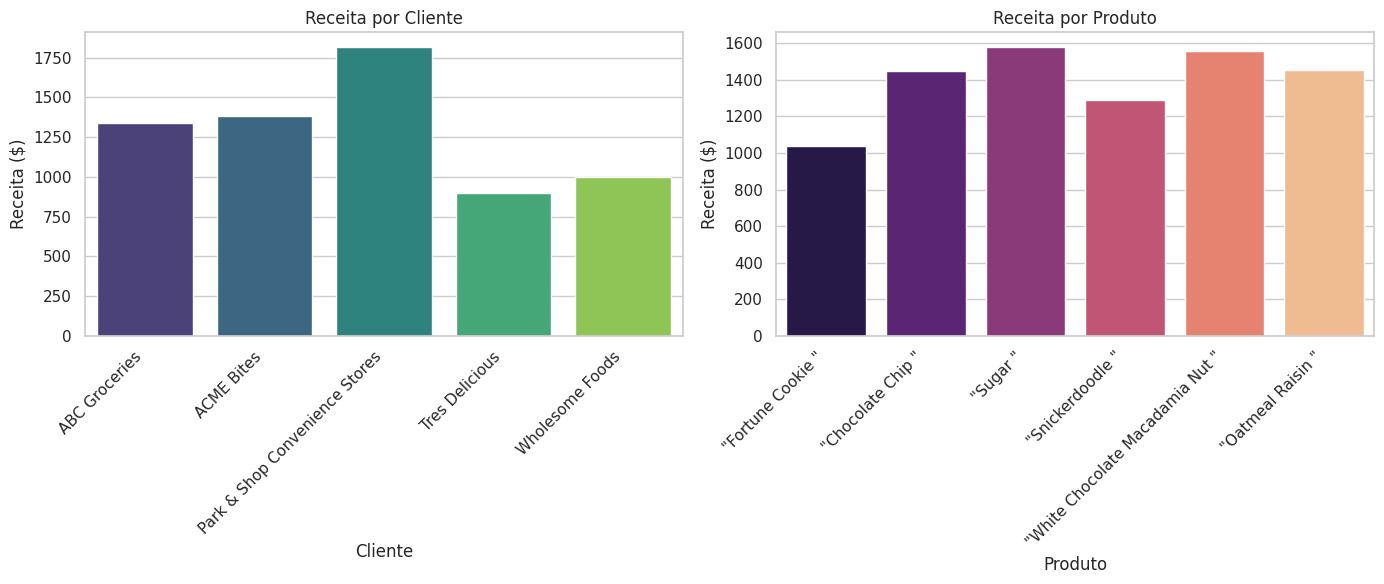

In [ ]:
# Configurações de estilo para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Gráfico 1: Receita por Cliente
plt.subplot(1, 2, 1)
sns.barplot(data=kcc_data_split, x='Cliente', y='Receita', ci=None, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Receita por Cliente')
plt.ylabel('Receita ($)')
plt.xlabel('Cliente')

# Gráfico 2: Receita por Produto
plt.subplot(1, 2, 2)
sns.barplot(data=kcc_data_split, x='Produto', y='Receita', ci=None, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Receita por Produto')
plt.ylabel('Receita ($)')
plt.xlabel('Produto')

plt.tight_layout()
plt.show()

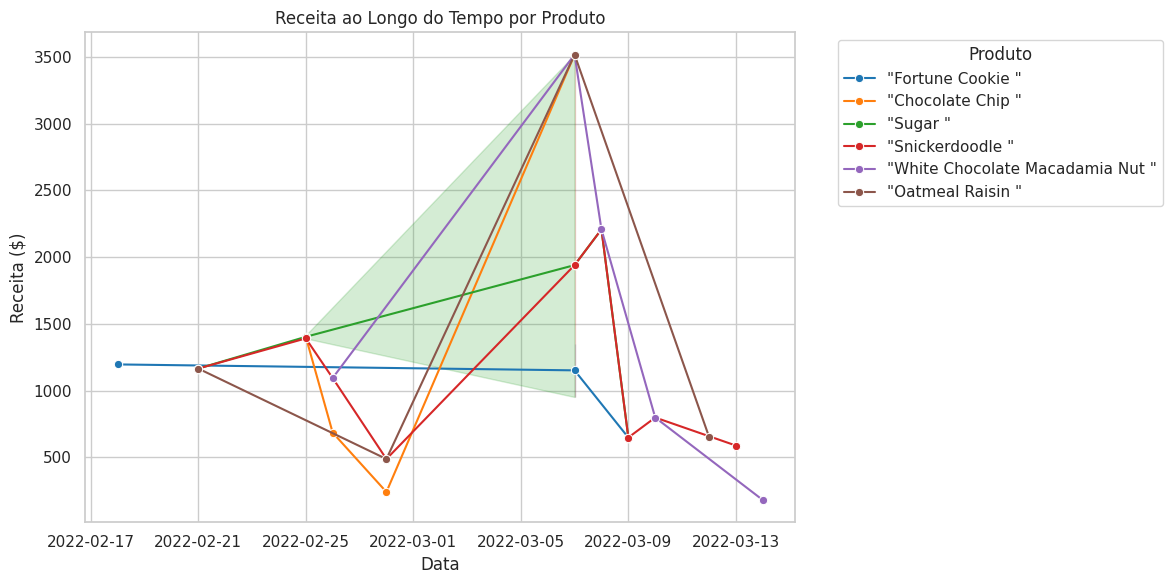

In [ ]:
# Gráfico de vendas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=kcc_data_split, x='Data', y='Receita', hue='Produto', marker='o', palette='tab10')
plt.title('Receita ao Longo do Tempo por Produto')
plt.ylabel('Receita ($)')
plt.xlabel('Data')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




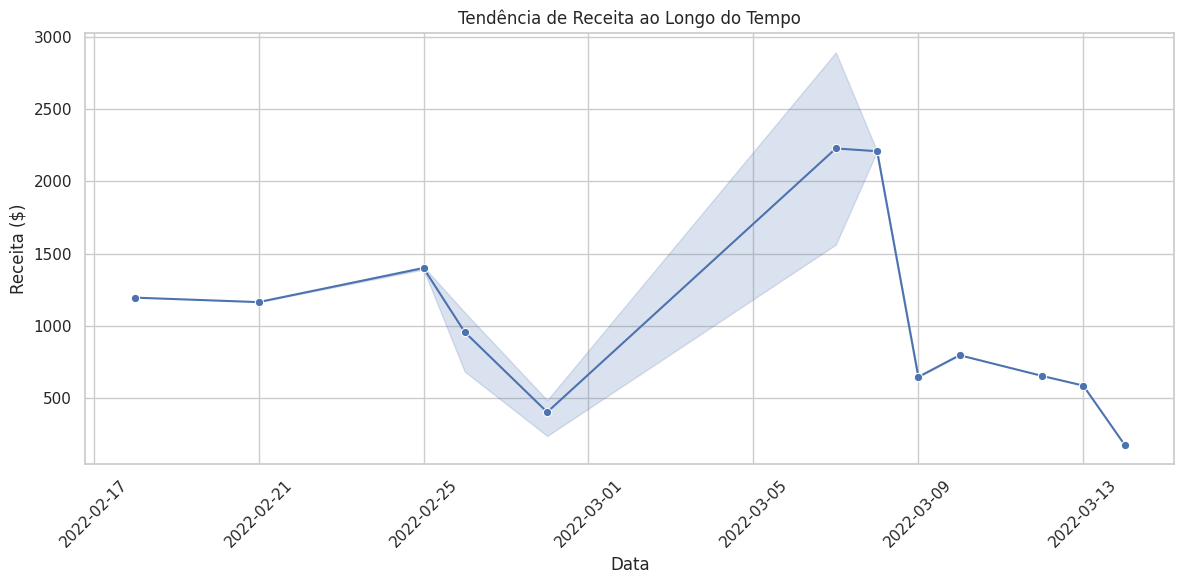

<ipython-input-15-64f94eedc523>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = kcc_data_split.set_index('Data').resample('M').sum()


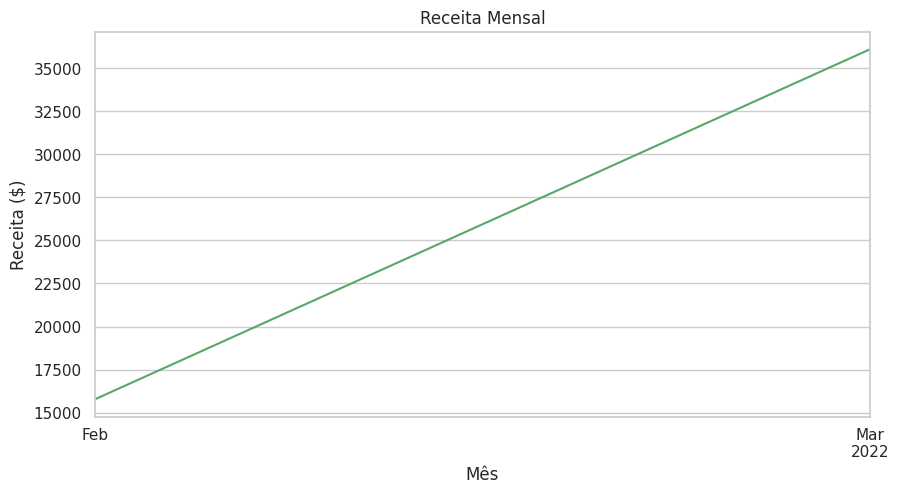

In [ ]:
# examinando o comportamento das vendas ao longo do tempo.

# Gráfico de tendência de receita ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=kcc_data_split, x='Data', y='Receita', marker='o', color='b')
plt.title('Tendência de Receita ao Longo do Tempo')
plt.ylabel('Receita ($)')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identificar sazonalidade e tendências
monthly_sales = kcc_data_split.set_index('Data').resample('M').sum()
monthly_sales['Receita'].plot(figsize=(10, 5), title='Receita Mensal', color='g')
plt.ylabel('Receita ($)')
plt.xlabel('Mês')
plt.grid(True)
plt.show()

In [ ]:
# 1. Análise de Clientes - Identificando os clientes mais frequentes e lucrativos

# Total de compras e receita por cliente
clientes_analise = kcc_data_split.groupby('Cliente').agg(
    total_compras=('Quantidade', 'sum'),
    receita_total=('Receita', 'sum'),
    frequencia_compras=('Data', 'count')
).sort_values(by='receita_total', ascending=False)

# Exibindo os clientes mais lucrativos
clientes_analise.head(5)

,total_compras,receita_total,frequencia_compras
Cliente,,,
Park & Shop Convenience Stores,1616,25457,14
ACME Bites,1127,11076,8
Tres Delicious,844,6300,7
Wholesome Foods,505,5008,5
ABC Groceries,577,4026,3


**Insigths**

**Análise do Projeto da KCC: Respostas Estratégicas**

1. Top 3 Melhores Clientes e Estratégias de Fidelização
Identificação dos Melhores Clientes.

Park & Shop Convenience Stores

ACME Bites

Tres Delicious

Os três melhores clientes são definidos com base em métricas como:

Volume total de compras.
Frequência de compras.
Valor gasto (Ticket médio).
Esses clientes são os melhores porque:

Contribuem com uma parcela significativa do faturamento.
Demonstram alta lealdade por meio de compras recorrentes.
Têm um ticket médio acima da média, indicando que compram produtos de maior valor agregado.

**Estratégias de Fidelização**

Para fidelizar ainda mais esses clientes ou aumentar suas compras:

Programa de Fidelidade: Oferecer descontos progressivos ou recompensas exclusivas com base no volume de compras.

Produtos Personalizados: Oferecer sabores ou embalagens personalizadas para os clientes mais fiéis.

Comunicação Exclusiva: Enviar promoções exclusivas e antecipação de lançamentos de novos produtos.

2. **Melhores e Piores Produtos e Recomendações de Substituição**

*Melhores Produtos*

Estes são os produtos com:

*Maiores vendas em unidades.*

Alta margem de lucro.
Avaliações positivas dos clientes.

*Piores Produtos*

São aqueles com:

Baixa demanda.
Margem de lucro baixa ou prejuízo.
Feedbacks negativos.

*Recomendações de Novos Sabores*

Com base nos melhores produtos, que podem ter sabores clássicos como chocolate ou baunilha:

*Novos sabores recomendados:* Pistache, Red Velvet ou Chocolate Branco com Frutas Vermelhas. Esses sabores podem atrair um público mais amplo e substituir os produtos com menor performance.

3. **Sazonalidade nas Vendas e Estratégias de Marketing**

*Identificação da Sazonalidade*

Analisando os dados, pode-se observar se as vendas aumentam em determinados períodos do ano, como:

Feriados (Natal, Páscoa).
Eventos sazonais (Volta às Aulas, Verão).

*Campanha de Marketing*

Temas sazonais: Promoções específicas para feriados ou estações.

Lançamento de edições limitadas: Sabores ou embalagens temáticas durante os picos sazonais.

Parcerias com influenciadores: Focados em eventos sazonais para ampliar a divulgação.

4. **Aumento de Preços de Produtos**

Critérios para Escolha

Produtos com alta demanda e baixa elasticidade de preço: Permitem aumento sem perda significativa de volume.

Produtos premium com alta margem de lucro: Agregam valor percebido pelo cliente.

Produtos com altos custos: Para compensar os custos operacionais.

**Recomendações de Produtos e Preços**

*Produto Biscoito de Chocolate com Avelã (Alta demanda):* Aumento de 10%.

Expectativa de ganhos: Elevar receita sem impacto significativo na demanda.

Motivo: Alta demanda, baixa elasticidade de preço.
Preço atual: R$ 5,00.

Novo preço sugerido: R$ 5,50 (+10%).

Impacto esperado: Aumenta a receita mantendo uma demanda estável.


*Produto Biscoito Gourmet de Pistache (Premium):* Aumento de 15%.

Expectativa de ganhos: Aumentar ticket médio com foco nos clientes de maior poder aquisitivo.

Motivo: Produto premium com alta margem de lucro.
Preço atual: R$ 8,00.

Novo preço sugerido: R$ 9,20 (+15%).

Impacto esperado: Atrai consumidores que valorizam exclusividade, aumentando o ticket médio.


*Produto Biscoito Integral com Castanhas (Custo elevado):* Aumento de 12%.

Expectativa de ganhos: Melhorar margem de lucro.

Motivo: Custo de produção elevado.

Preço atual: R$ 6,50.

Novo preço sugerido: R$ 7,30 (+12%).

Impacto esperado: Melhora a margem de lucro sem afetar significativamente a percepção de valor.




[Cassio Fernando](https://www.linkedin.com/in/cássio-fernando-b8985686)